<table width="100%" style="padding:0; margin-left:-6px;">
    <tr style="padding=0;" width="100%">
        <td width="auto">
           <hr style="border:2px solid darkblue">
            <h1> nb5. Query by spatial resolution</h1>
           <hr style="border:2px solid darkblue">
        </td>
        <td width="60px">
           <img src="ALMAsmall.png" align="right"/> 
        </td>
    </tr>
</table>  


-------------

The relevant columns in the ALMA Science Archive TAP service are 
* *spatial_resolution*
 
--------- ----- -----





Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import pyvo

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")      # for the EU ALMA TAP service

# service = pyvo.dal.TAPService("https://almascience.nao.ac.jp/tap")  # for the EA ALMA TAP service
# service = pyvo.dal.TAPService("https://almascience.nrao.edu/tap")   # for the NA ALMA TAP service

<hr style="border:2px solid darkblue"> </hr>


## Query a given spatial resolution within a science keyword and data type
<hr style="border:2px solid darkblue"> </hr>




In [2]:
def query_science_keyword_data_type_spatial_resolution(service, science_keyword, datatype, res_min, res_max):
    """Queries in a single query for the keyword, datatype (cube or image) and resolutions of science observations
    
       service               pyvo TAPService instance
       science_keyword       one of the science keywords (see Notebook 4, Example 4a or the ALMA Science Archive query interface)
       datatype              "cube" or "image"
       res_min               minimum spatial resolution in arcsec (see Notebook 0, Example 0a for the list of columns and their units)
       res_max               maximum spatial resolution in arcsec
              
       returns               pandas table    
    """

    query = f"""   
            SELECT * 
            FROM ivoa.obscore 
            WHERE science_keyword like '%{science_keyword}%'  
            AND science_observation = 'T' 
            AND dataproduct_type = '{datatype}'  
            AND spatial_resolution < '{res_max}'  
            AND spatial_resolution > '{res_min}'  
            """
    
    return service.search(query).to_table().to_pandas()

------------------------------------------------------- 

## Example 5a: Query all continuum observations of "starburst galaxies" (science keyword) with spatial resolution <0.1 arcsec

In [3]:
output_cont = query_science_keyword_data_type_spatial_resolution(service, 'Starburst galaxies', 'image', 0, 0.1)
output_cont.head(5)

access_url access_format  \
0  http://almascience.org/aq?member_ous_id=uid://...     text/html   
1  http://almascience.org/aq?member_ous_id=uid://...     text/html   
2  http://almascience.org/aq?member_ous_id=uid://...     text/html   
3  http://almascience.org/aq?member_ous_id=uid://...     text/html   
4  http://almascience.org/aq?member_ous_id=uid://...     text/html   

      proposal_id data_rights  gal_longitude  gal_latitude  \
0  2013.1.00001.S      Public      99.677774    -57.988309   
1  2013.1.00001.S      Public      99.677774    -57.988309   
2  2013.1.00001.S      Public      99.677774    -57.988309   
3  2013.1.00001.S      Public      99.677774    -57.988309   
4  2013.1.00001.S      Public     107.865398    -61.832810   

             obs_publisher_did obs_collection facility_name instrument_name  \
0  ADS/JAO.ALMA#2013.1.00001.S           ALMA           JAO            ALMA   
1  ADS/JAO.ALMA#2013.1.00001.S           ALMA           JAO            ALMA   
2  ADS/JAO.ALMA#2013.1.00001.S           ALMA           JAO            ALMA   
3  ADS/JAO.ALMA#2013.1.00001.S           ALMA           JAO            ALMA   
4  ADS/JAO.ALMA#2013.1.00001.S           ALMA           JAO            ALMA   

   ...   frequency velocity_resolution  obs_creator_name  \
0  ...  343.493812        26653.960581       Ivison, Rob   
1  ...  343.493812        26653.960581       Ivison, Rob   
2  ...  343.493812        26653.960581       Ivison, Rob   
3  ...  343.493812        26653.960581       Ivison, Rob   
4  ...  343.493836        26653.960581       Ivison, Rob   

                                           pub_title  \
0  A dusty star-forming galaxy at z = 6 revealed ...   
1  A dusty star-forming galaxy at z = 6 revealed ...   
2  A dusty star-forming galaxy at z = 6 revealed ...   
3  A dusty star-forming galaxy at z = 6 revealed ...   
4  A dusty star-forming galaxy at z = 6 revealed ...   

                                        first_author  qa2_passed  \
0  Klitsch, A. Long, Arianna S. Ma, Jingzhe Oteo,...           T   
1  Klitsch, A. Long, Arianna S. Ma, Jingzhe Oteo,...           T   
2  Klitsch, A. Long, Arianna S. Ma, Jingzhe Oteo,...           T   
3  Klitsch, A. Long, Arianna S. Ma, Jingzhe Oteo,...           T   
4  Klitsch, A. Long, Arianna S. Ma, Jingzhe Oteo,...           T   

                                       bib_reference  \
0  2016ApJ...827...34O 2017ApJ...850....1R 2018Ap...   
1  2016ApJ...827...34O 2017ApJ...850....1R 2018Ap...   
2  2016ApJ...827...34O 2017ApJ...850....1R 2018Ap...   
3  2016ApJ...827...34O 2017ApJ...850....1R 2018Ap...   
4  2016ApJ...827...34O 2017ApJ...850....1R 2018Ap...   

                             science_keyword  scientific_category  \
0  Starburst galaxies, Sub-mm Galaxies (SMG)      Active galaxies   
1  Starburst galaxies, Sub-mm Galaxies (SMG)      Active galaxies   
2  Starburst galaxies, Sub-mm Galaxies (SMG)      Active galaxies   
3  Starburst galaxies, Sub-mm Galaxies (SMG)      Active galaxies   
4  Starburst galaxies, Sub-mm Galaxies (SMG)      Active galaxies   

              lastModified  
0  2021-09-30T16:34:41.133  
1  2021-09-30T16:34:41.133  
2  2021-09-30T16:34:41.133  
3  2021-09-30T16:34:41.133  
4  2021-09-30T16:34:41.133  

[5 rows x 63 columns]

This is the distribution of high spatial-resolution continuum observations of starburst galaxies:

<AxesSubplot:ylabel='Frequency'>

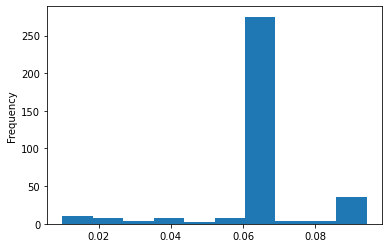

In [4]:
output_cont['spatial_resolution'].plot.hist(bins=10)

These are the target names associated with the continuum observations of starburst galaxies at high spatial-resolutions.

In [5]:
len(np.unique(output_cont['target_name'])), np.unique(output_cont['target_name'])

(87,
 array(['3c368', 'ALESS_112.1', 'ALESS_15.1', 'ALESS_17.1', 'ALESS_3.1',
        'ALESS_76.1', 'ALESS_9.1', 'AzTEC-3', 'AzTEC_8', 'GDS-25998',
        'GDS-9834', 'HELMS_182', 'HELMS_34', 'HELMS_42', 'HELMS_65',
        'J2054-0005', 'MAMBO-9', 'SDSS_J2310+1855', 'SGP-33512',
        'SGP-466329', 'SGP-51987', 'SGP-759717', 'SGP38326',
        'SMMJ21352-0102', 'UDF2', 'UDF3', 'VV2006_J205724.2-003019',
        'scuba2-035', 'scuba2-038', 'scuba2-041', 'scuba2-046',
        'scuba2-048', 'scuba2-053', 'scuba2-054', 'scuba2-055',
        'scuba2-061', 'scuba2-062', 'scuba2-064', 'scuba2-065',
        'scuba2-066', 'scuba2-067', 'scuba2-068', 'scuba2-069',
        'scuba2-070', 'scuba2-072', 'scuba2-074', 'scuba2-075',
        'scuba2-076', 'scuba2-077', 'scuba2-080', 'scuba2-083',
        'scuba2-084', 'scuba2-085', 'scuba2-086', 'scuba2-089',
        'scuba2-091', 'scuba2-093', 'scuba2-094', 'scuba2-095',
        'scuba2-097', 'scuba2-098', 'scuba2-099', 'scuba2-100',
        'scu


--------------------------------
## Example 5b: Query all line observations of starburst galaxies with spatial resolution <0.1 arcsec

In [6]:
output_spec = query_science_keyword_data_type_spatial_resolution(service, 'Starburst galaxies', 'cube', 0, 0.1)

This is the distribution of high spatial-resolution spectroscopic observations of starburst galaxies:

<AxesSubplot:ylabel='Frequency'>

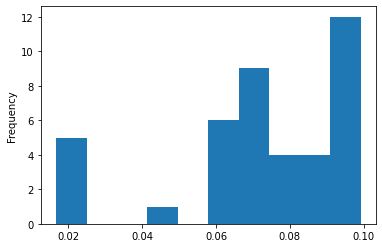

In [7]:
output_spec['spatial_resolution'].plot.hist(bins=10)

These are the target names associated with the spectroscopic observations of starburst galaxies at high spatial-resolutions.

In [8]:
len(np.unique(output_spec['target_name'])), np.unique(output_spec['target_name'])

(11,
 array(['AzTEC-3', 'AzTEC_8', 'BRI1335', 'CDFS_12631', 'GDS-25998',
        'NB2315', 'PKS_0529-549', 'SGP38326', 'SGP54107', 'SMMJ21352-0102',
        'VV2006_J205724.2-003019'], dtype=object))